In [66]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pathlib import Path as Path
import os

IMGDIR = Path('/Users/evpc/Documents/Senodis/opencv-notebooks/sampleData')

In [67]:
def imshow(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

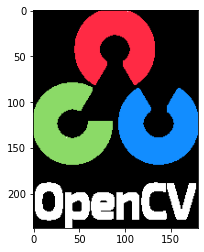

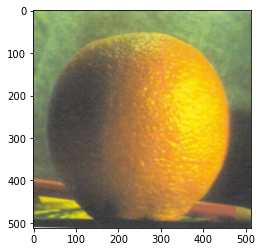

In [68]:
logo = cv2.imread(str(IMGDIR/'opencv-logo-white.png'))
imshow(logo)

img = cv2.imread(str(IMGDIR/'orange.jpg'))
imshow(img)

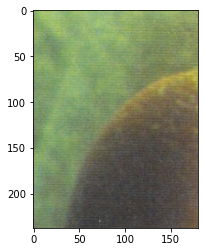

In [69]:
rows, cols = logo.shape[:2]
roi = img[0:rows, 0:cols, :]
imshow(roi)

Inverted mask:


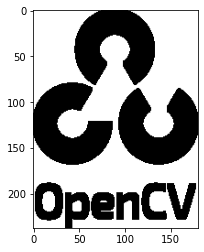

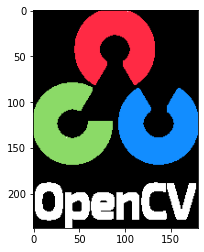

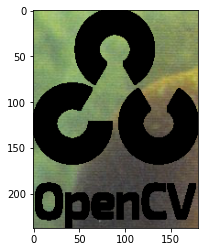

In [70]:
logo2gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(logo2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

print('Inverted mask:')
imshow(mask_inv)

#take only logo region
logo_fg = cv2.bitwise_and(logo, logo, mask=mask)
imshow(logo_bg)

#black out logo area in roi:
roi_bo = cv2.bitwise_and(roi, roi, mask=mask_inv)
imshow(img_bo)

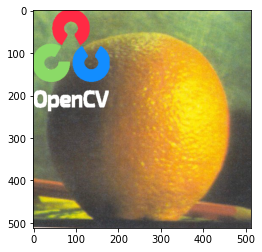

In [81]:
dest1 = cv2.add(roi_bo, logo_fg)
img_logo1 = img.copy()
img_logo1[0:rows, 0:cols] = dest1
imshow(img_logo1)

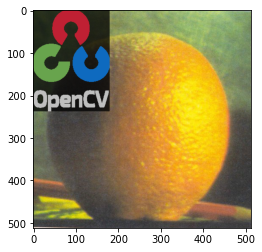

In [87]:
alpha = 0.25
dest2 = cv2.addWeighted(roi_bo, alpha, logo_fg, 1-alpha, 0)
img_logo2 = img.copy()
img_logo2[0:rows, 0:cols] = dest2
imshow(img_logo2)

In [ ]:
o